In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "../Archivos/global-temperatures.csv"
df = pd.read_csv(filename,
  parse_dates=["dt"], # conversión a tipo datetime
  usecols=[ "dt" , "LandAverageTemperature" ])
df.rename(columns={ "dt" : "when" , "LandAverageTemperature" : "temp" }, inplace=True)
df.dropna(inplace=True)
df.head()

#df.describe()
#df.info()
#df.shape

,when,temp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


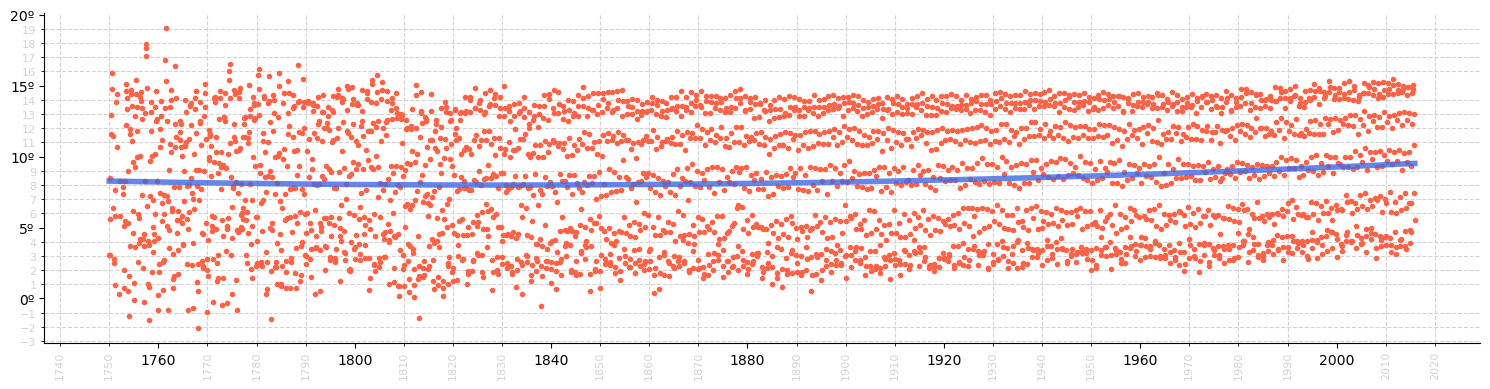

In [2]:
from matplotlib.dates import YearLocator, DateFormatter, date2num
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(15, 4)) # 800x400 px
# Alias para simplificar el acceso
x = df.when
y = df.temp
ax.plot(x, y,
  linestyle= "None" , marker=".", color="tomato" , # estilo de línea
  zorder=2) # orden para colocar sobre rejilla
# Construcción de la línea de tendencia
x = date2num(x)
z = np.polyfit(x, y, 2) # ajuste polinómico de grado 2
p = np.poly1d(z)
plt.plot(x, p(x), linewidth=4, alpha=0.8, color= "royalblue" )


# Formateo de los ejes
ax.xaxis.set_minor_locator(YearLocator(10))
ax.xaxis.set_minor_formatter(DateFormatter( "%Y" ))
ax.tick_params(axis="x" , which= "minor", labelsize=8, labelcolor= "lightgray" , rotation=90)
ax.xaxis.grid(which= "minor" , color= "lightgray" , linestyle= "dashed" )

ax.yaxis.set_major_formatter( StrMethodFormatter("{x:.0f}º") )
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis="y" , which= "minor" , labelsize=8, labelcolor= "lightgray" )
ax.yaxis.grid(which= "minor" , linestyle= "dashed" , color= "lightgray" )
ax.yaxis.set_minor_formatter( StrMethodFormatter("{x:.0f}") )
ax.tick_params(axis="y" , which= "minor" , labelsize=8, labelcolor= "lightgray" )
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.tight_layout()